# Question 10

10(a) Why are GLoVE embeddings trained on the ratio of co-occurrence probabilities rather than the probabilities themselves?
reference: From the paper and https://medium.com/sciforce/word-vectors-in-natural-language-processing-global-vectors-glove-51339db89639

Based on the example from the paper, We can see that it is not able to get the accurate relationship if we simply consider the probability. The way GloVe predicts surrounding words is by maximizing the probability of a context word occurring given a center word by performing a dynamic logistic regression. 
Let P(k|w) be the probability that the word k appears in the context of word w: ice co-occurs more frequently with solid than it does with gas. P(solid | ice) will be relatively high, and P(solid | steam) will be relatively low. Therefore, the ratio of P(solid | ice) / P(solid | steam) will be large. This example shows that the probabilities cooccurrence of the word solid with word ice and word steam both are very small numbers, about 0.0001. However, the ratio is a relatively large number about 9. So we are easy to know that word solid is much closer to the word ice rather than word steam by ratio.


10(b) In the two sentences: “James is running in the park.” and “James is running for the presidency.”, would GLoVE embeddings return the same vector for the word running in both cases? Why or why not?

No, it will return different vectors for the word running. This is because when GLoVE generates a vector for a word not only it will consider global corpus but also word local context.I this case, 'running' is in different contexts.



In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random

np.random.seed(42)
random.seed(42)

In [2]:
embeddings_dict = {}
dimension_of_glove = 300
with open('glove/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']-embeddings_dict['wife']+embeddings_dict['husband']))
print(np.linalg.norm(embeddings_dict['queen']-embeddings_dict['king']))
print(np.linalg.norm(embeddings_dict['wife']-embeddings_dict['husband']))

6.165036
5.966258
3.1520464


10(c) What do you expect for the values of,
||GLoVE["queen"] - GLoVE["king"] - GLoVE["wife"] + GLoVE["husband"]||2,
||GLoVE["queen"] - GLoVE["king"]||2 and ||GLoVE["wife"] - GLoVE["husband"]||2 ?
Compare these values.

The values are 6.165036, 5.966258, 3.1520464 respectively.The first vector represents the relationship between the word queen to word king, which is similar the vector represents wife and husband, and the value is pretty close to the second vector. However, the thrid vector scores only 3. This means that the word 'wife' is more analogous to 'husband' compared to king' with queen'

10(d) Given a word, would you rather stem or lemmatize the word before mapping it to its GLoVE embedding?

No. When using the Glove embedding, we should consider word contexts because variant forms of the word would have different contexts. Any form of stemming or lemmatization will ruin the process.


# Question 11

In [3]:
from string import punctuation
from nltk import word_tokenize
def without_TF_IDF(text):
    sent = word_tokenize(text)
    sent = [i for i in sent if i not in punctuation] 
    sent = [i for i in sent if not i.isdigit()] 
    return sent

In [4]:
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter


In [5]:
data = pd.read_csv('Project_1_dataset_01_01_2022.csv')
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(data[["full_text","root_label"]], test_size = 0.2, random_state = 42)

train2['full_text'] = train2['full_text'].map(lambda text: clean(text))
test2['full_text'] = test2['full_text'].map(lambda text: clean(text))


In [6]:
train2["root_label"] = train2["root_label"].astype('category')
train2["target"] = train2["root_label"].cat.codes
train2["root_label"] = train2["root_label"].astype('object')

test2["root_label"] = test2["root_label"].astype('category')
test2["target"] = test2["root_label"].cat.codes
test2["root_label"] = test2["root_label"].astype('object')

In [7]:
# embeddings_index = {}
# embeddings_matrix = np.zeros((len(embeddings_dict)+1, 300))
# for word, i in embeddings_dict.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         embeddings_matrix[i] = embedding_vector
        
# print('Shape of the Embeddings Matrix: ',embeddings_matrix.shape)

In [8]:
#pip install -U gensim

In [9]:
# import gensim
# from gensim import models
# from gensim.models import Word2Vec, KeyedVectors
# from gensim.test.utils import datapath, get_tmpfile
# from gensim.models import KeyedVectors

# from gensim.scripts.glove2word2vec import glove2word2vec
# glove_input_file = 'glove/glove.6B.300d.txt'
# word2vec_output_file = 'glove.6B.300d.txt.word2vec'
# glove2word2vec(glove_input_file, word2vec_output_file)

# # load the Stanford GloVe model
# word2vec_output_file = 'glove.6B.300d.txt' + '.word2vec'
# model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [10]:
#reference from online GloveVectorizer model. 

class GloveVectorizer:
  def __init__(self, filename):
    self.filename = filename
    word2vec = {}
    embedding = []
    idx2word = []
    with open(self.filename, 'r', encoding='utf-8') as f:
      for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec
        embedding.append(vec)
        idx2word.append(word)
    print('Found %s word vectors.' % len(word2vec))

    self.word2vec = word2vec
    self.embedding = np.array(embedding)
    self.word2idx = {v:k for k,v in enumerate(idx2word)}
    self.V, self.D = self.embedding.shape

  def fit(self, data):
    pass

  def transform(self, data):
    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.lower().split()
      vecs = []
      for word in tokens:
        if word in self.word2vec:
          vec = self.word2vec[word]
          vecs.append(vec)
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X

  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)


In [11]:
from sklearn.metrics import auc, roc_curve, plot_roc_curve, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB

vectorizer = GloveVectorizer('glove/glove.6B.300d.txt')

X_train_Q11 = vectorizer.fit_transform(train2['full_text'])
y_train_Q11 = train2['target']
X_test_Q11 = vectorizer.transform(test2['full_text'])
y_test_Q11 = test2['target']

gnb_Q11 = GaussianNB()
gnb_Q11.fit(X_train_Q11, y_train_Q11)
pred_Q11 = gnb_Q11.predict(X_test_Q11)
print('accuracy:', accuracy_score(y_test_Q11, pred_Q11))
print('recall:', recall_score(y_test_Q11, pred_Q11,average='macro'))
print('precision:', precision_score(y_test_Q11, pred_Q11,average='macro'))
print('f1_score:', f1_score(y_test_Q11, pred_Q11,average='macro'))

Found 400000 word vectors.
Numer of samples with no words found: 0 / 1657
Numer of samples with no words found: 0 / 415
accuracy: 0.9228915662650602
recall: 0.9226784967714963
precision: 0.9244530484676028
f1_score: 0.9227906976744187


11(a): For the binary classification task distinguishing the “sports” class and “climate”
class:

Class GloveVectorizer is the glove model used without TF-IDF. I define a custom vectorized class to convert sentences in training documents into GLoVE features. The goal is to convert each sentence data into a vector of length 300. For the entire embedding matrix, we transform each data based on pre-trained GLoVE embeddings and take the mean value of each value to represent the corresponding embedding. 

11(b) Select a classifier model, train and evaluate it with your GLoVE-based feature.

I am using naive_bayes as my classifier. However, by comparing the result with Question 7, the accuracy does not improve much(both are around 92%-93%). This probably indicates that out databases are effected similarly using both TF-IDF and Glove embedding.

# Question 12

Found 400000 word vectors.
Numer of samples with no words found: 0 / 1657
Numer of samples with no words found: 0 / 415
Found 400000 word vectors.
Numer of samples with no words found: 0 / 1657
Numer of samples with no words found: 0 / 415
Found 400000 word vectors.
Numer of samples with no words found: 0 / 1657
Numer of samples with no words found: 0 / 415
Found 400000 word vectors.
Numer of samples with no words found: 0 / 1657
Numer of samples with no words found: 0 / 415


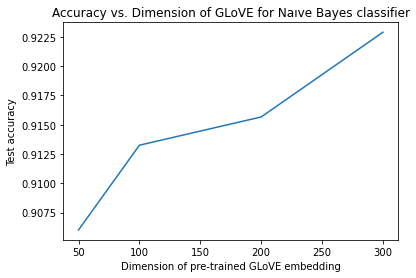

In [12]:
filenames_glove = ['glove/glove.6B.50d.txt','glove/glove.6B.100d.txt','glove/glove.6B.200d.txt','glove/glove.6B.300d.txt']
accuracy_list = []
for filename in filenames_glove:
    vectorizer = GloveVectorizer(filename)
    
    X_train_Q11 = vectorizer.fit_transform(train2['full_text'])
    y_train_Q11 = train2['target']
    X_test_Q11 = vectorizer.transform(test2['full_text'])
    y_test_Q11 = test2['target']

    gnb_Q11.fit(X_train_Q11, y_train_Q11)
    pred_Q11 = gnb_Q11.predict(X_test_Q11)
    accuracy = accuracy_score(y_test_Q11, pred_Q11)
    accuracy_list.append(accuracy)
    

dim_list = [50,100,200,300]
plt.plot(dim_list,accuracy_list)
plt.title('Accuracy vs. Dimension of GLoVE for Naıve Bayes classifier')
plt.xlabel('Dimension of pre-trained GLoVE embedding')
plt.ylabel('Test accuracy')
plt.show()

QUESTION 12: Plot the relationship between the dimension of the pre-trained GLoVE embedding
and the resulting accuracy of the model in the classification task. Describe the observed trend. Is
this trend expected? Why or why not? In this part use the different sets of GLoVE vectors from the
link.

I simply use matplotlib.pyplot to describe accuracy of different dataset.
The accuracy goes up when choosing from low to high dimension dataset. The trend is expected 
because the larger dataset we use, the higher chances model can find out words, and the more chances 
to distingish features of words, which improves accuracy



# Question 13

In [13]:
import umap.umap_ as umap
import umap.plot

In [14]:
reducer = umap.UMAP(n_components=2, metric='euclidean', random_state=42)
embedding = reducer.fit(X_train_Q11)
print(embedding.embedding_.shape)

(1657, 2)


In [15]:
labels = []
for label in labels:
    if(label==0):
        labels.append('Climate')
    else:
        labels.append('Sports')


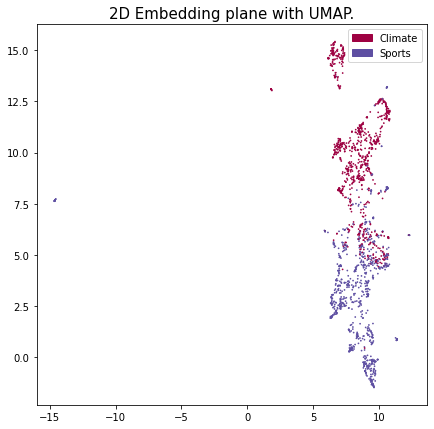

In [16]:
import matplotlib.patches as mpatches
plt.figure(figsize=(7,7))
plt.title('2D Embedding plane with UMAP.', fontsize=15)
cmap = plt.get_cmap('Spectral')
colors = cmap(np.linspace(0, 1, 2))
scatter = plt.scatter(embedding.embedding_[:, 0], embedding.embedding_[:, 1], s=0.5,c =y_train_Q11, cmap='Spectral',label=np.array(labels))
hex_color1=matplotlib.colors.to_hex(colors[0].tolist())
hex_color2=matplotlib.colors.to_hex(colors[1].tolist())
pop_a = mpatches.Patch(color=hex_color1, label='Climate')
pop_b = mpatches.Patch(color=hex_color2, label='Sports')
plt.legend(handles=[pop_a,pop_b])

plt.show()

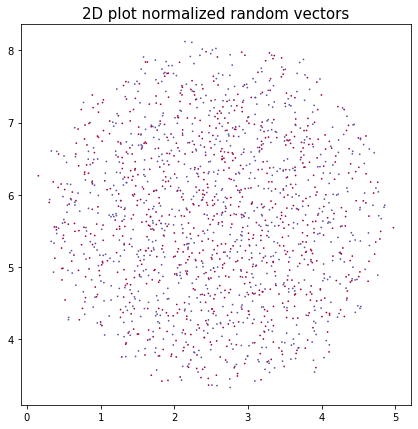

In [17]:
plt.figure(figsize=(7,7))
normalize = np.random.normal(0, 1, [1657,300])
normalize  = normalize / np.linalg.norm(normalize)
embedding_normalize = reducer.fit(normalize)
plot = plt.scatter(embedding_normalize.embedding_[:, 0], embedding_normalize.embedding_[:, 1], s=0.5,c =y_train_Q11, cmap='Spectral')
plt.title('2D plot normalized random vectors',fontsize=15)

plt.show()

QUESTION 13: Compare and contrast the two visualizations. Are there clusters formed in either
or both of the plots? We will pursue the clustering aspect further in the next project.

The first one generates clustering but the second one does not. This is normal since our embedding method makes differences of two categories, while the random generated data in the second plot are evenly distributed.